# Analyze LUCAS data

## Install

### Note for Google Colab

In the case that this notebook is run in [Google Colab](https://colab.research.google.com/), additional steps are needed. Google Colab comes with GDAL 2.2. We have to update this library to version 3.0. It will takes a while.

In [ ]:
!add-apt-repository --yes ppa:ubuntugis/ubuntugis-unstable
!apt update
!apt install libgdal26 libsqlite3-mod-spatialite 
!pip install gdal==3.0.4
print("INSTALLATION COMPLETED")

### Install st_lucas package

First of all, let's install [st_lucas](https://pypi.org/project/st-lucas/) Python package.

In [ ]:
!pip install st_lucas

Now **we have to restart runtime**: `Runtime -> Restart runtime` (on Google Colab) or ``Kernel -> Restart`` (on JupyterLab).

From `st_lucas` package let's import `LucasRequest`, `LucasIO` and `LucasClassAggregate`.

In [1]:
from st_lucas import LucasRequest, LucasIO, LucasClassAggregate

## Download sample LUCAS points

### Define request

Request LUCAS points located in the Czech Republic and surveyed in 2018.

In [2]:
request = LucasRequest()
request.countries = ['CZ']
request.years = [2018]

### Download data

In [3]:
lucasio = LucasIO()
lucasio.download(request)

2023-06-25 19:52:50,928 - LUCAS - INFO - io.download - Download process successfuly finished. Size of downloaded data: 27387kb


### Inspect downloaded LUCAS data

In [4]:
df = lucasio.to_geopandas()
df[["point_id","lc1"]]

point_id  lc1
0     48462894  A30
1     46142892  C10
2     48042992  A30
3     46142990  A30
4     46582898  A22
...        ...  ...
5708  46482884  A12
5709  47402970  A11
5710  46682906  G11
5711  47303016  G11
5712  45623046  A11

[5713 rows x 2 columns]

In [5]:
df.count()

point_id         5713
nuts0            5713
nuts1            5713
nuts2            5713
nuts3            5713
                 ... 
crop_residues    5713
transect            0
ex_ante          5713
survey_year      5713
geometry         5713
Length: 116, dtype: int64

### Show statistics

In [6]:
df["lc1"].describe()

count     5713
unique      57
top        E20
freq       990
Name: lc1, dtype: object

<AxesSubplot:ylabel='lc1_l1'>

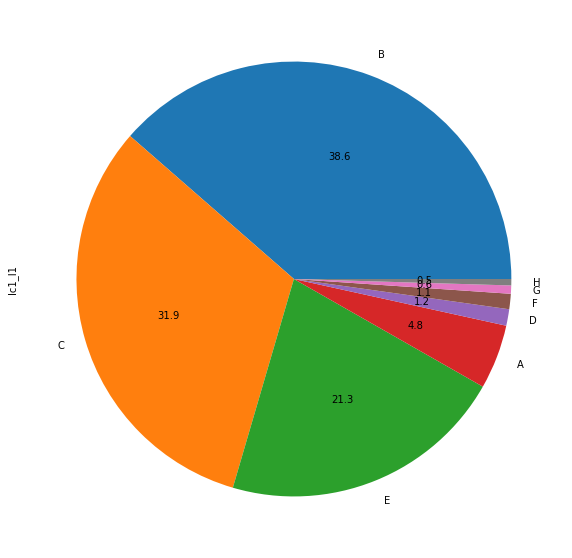

In [7]:
df['lc1_l1'] = df['lc1'].str.slice(0,1)
df['lc1_l1'].value_counts().plot.pie(figsize=(10, 10), autopct="%.1f")

## Class aggregation

LUCAS points are by default obtained with information corresponding to LUCAS land cover level 3. With the `LucasClassAggregate` method, you can get information about level 2 or level 1. New column will be added at the end of attribute table.

In [8]:
from st_lucas import LucasRequest, LucasIO, LucasClassAggregate
request = LucasRequest()
request.countries = ['CZ']
request.years = [2018]
lucasio = LucasIO()
lucasio.download(request)

lc1_to_level1 = {
    "A00": ["A11", "A12", "A13", "A21", "A22", "A30"],
    "B00": ["B11", "B12", "B13", "B14", "B15", "B16", "B17", "B18", "B19", "B21", "B22", "B23", "B31", "B32", "B33", "B34", "B35", "B36", "B37", "B41", "B42", "B43", "B44", "B45", "B51", "B52", "B53", "B54", "B55", "B71", "B72", "B73", "B74", "B75", "B76", "B77", "B81", "B82", "B83", "B84"],
    "Bx1": ["Bx1"],
    "Bx2": ["Bx2"],
    "C00": ["C10", "C21", "C22", "C23", "C31", "C32", "C33"],
    "D00": ["D10", "D20"],
    "E00": ["E10", "E20", "E30"],
    "F00": ["F10", "F20", "F30", "F40"],
    "G00": ["G11", "G12", "G21", "G22", "G30", "G40", "G50"],
    "H00": ["H11", "H12", "H21", "H22", "H23"]
}

lucasaggr = LucasClassAggregate(lucasio.data, mappings=lc1_to_level1)
lucasaggr.apply()

2023-06-25 19:53:18,974 - LUCAS - INFO - io.download - Download process successfuly finished. Size of downloaded data: 27387kb


Check the appearance of the new column.

In [9]:
df = lucasio.to_geopandas()
df[["lc1_h", "lc1_a"]].head()


lc1_h lc1_a
0   A30   A00
1   C10   C00
2   A30   A00
3   A30   A00
4   A22   A00

## Nomenclature translation

Translate the obtained data into CLC2.

In [10]:
from st_lucas import LucasClassTranslate

lucastrans = LucasClassTranslate(lucasio.data)
lucastrans.set_translations("CLC2")
lucastrans.apply()

Check the appearance of the new column.

In [11]:
df = lucasio.to_geopandas()
df[["lc1_h", "lu1_h", "clc2"]].head(10)

lc1_h lu1_h clc2
0   A30  U319   99
1   C10  U120   31
2   A30  U319   99
3   A30  U319   99
4   A22  U312   12
5   A22  U312   12
6   A30  U319   99
7   B73  U113   22
8   B71  U113   22
9   B73  U113   22